In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import  load_iris

In [4]:
from google.colab import files
uploaded = files.upload()

Saving online_shoppers_intention.csv to online_shoppers_intention.csv


In [419]:
import io
df= pd.read_csv(io.BytesIO(uploaded['online_shoppers_intention.csv']))

In [420]:
import math
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

from sklearn.model_selection import train_test_split

In [421]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [358]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [151]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157214,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [10]:
#To see unique values of each column
for x in df.columns:
  
  print (x,df[x].unique())

Administrative [ 0  1  2  4 12  3 10  6  5  9  8 16 13 11  7 18 14 17 19 15 24 22 21 20
 23 27 26]
Administrative_Duration [  0.         53.         64.6       ... 167.9107143 305.125
 150.3571429]
Informational [ 0  1  2  4 16  5  3 14  6 12  7  9 10  8 11 24 13]
Informational_Duration [  0.   120.    16.   ... 547.75 368.25 211.25]
ProductRelated [  1   2  10  19   0   3  16   7   6  23  13  20   8   5  32   4  45  14
  52   9  46  15  22  11  12  36  42  27  90  18  38  17 128  25  30  21
  51  26  28  31  24  50  96  49  68  98  67  55  35  37  29  34  71  63
  87  40  33  54  64  75  39 111  81  61  47  44  88 149  41  79  66  43
 258  80  62  83 173  48  58  57  56  69  82  59 109 287  53  84  78 137
 113  89  65  60 104 129  77  74  93  76  72 194 140 110 132 115  73 328
 160  86 150  95 130 151 117 124 127 125 116 105  92 157 154 220 187 112
 131 159  94 204 142 206 102 313 145  85  97 198 181 126 106 101 108 119
  70 122  91 276 100 291 114 172 217 141 133 156 136 180 135 195 

In [422]:
df.shape

(12330, 18)

In [152]:
         df.isnull().sum()                                                                                                   

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

# EDA

0    7313
1    1445
Name: Revenue, dtype: int64


Text(0.5, 1.0, 'Revenue')

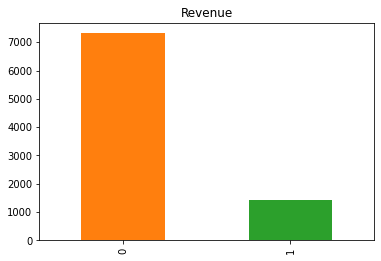

In [113]:
print(df.Revenue.value_counts())
df.Revenue.value_counts().plot(kind='bar', color=['C1', 'C2'])
plt.title('Revenue')

Text(0.5, 1.0, 'BounceRates vs ExitRates')

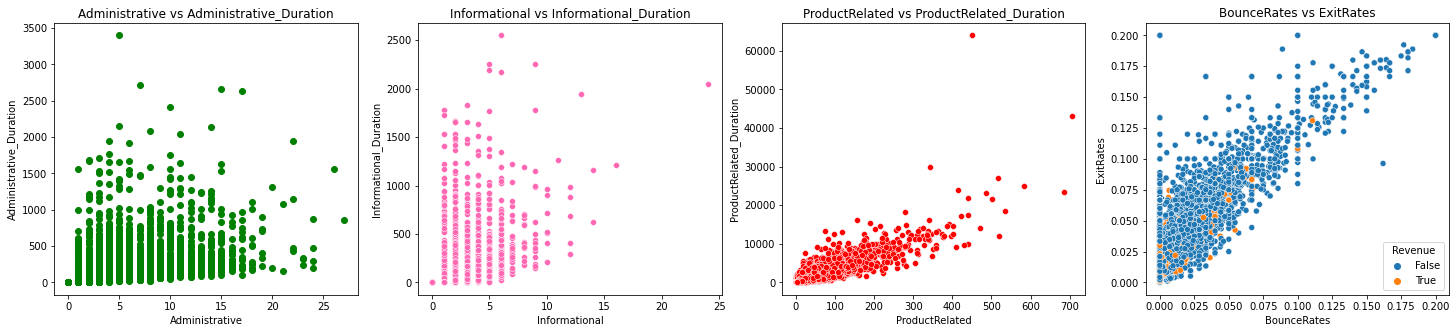

In [69]:
plt.figure(figsize=(25,5))
ax=plt.subplot(131)
plt.scatter(x=df['Administrative'], y=df['Administrative_Duration'], color = 'green')
plt.xlabel('Administrative')
plt.ylabel('Administrative_Duration')
plt.title('Administrative vs Administrative_Duration')
ax=plt.subplot(132)
sns.scatterplot(x=df['Informational'], y=df['Informational_Duration'], color = 'hotpink')
plt.title('Informational vs Informational_Duration')
ax=plt.subplot(133)
sns.scatterplot(x=df['ProductRelated'], y=df['ProductRelated_Duration'], color = 'red')
plt.title('ProductRelated vs ProductRelated_Duration')

Text(0.5, 1.0, 'ProductRelated_Duration vs Revenue')

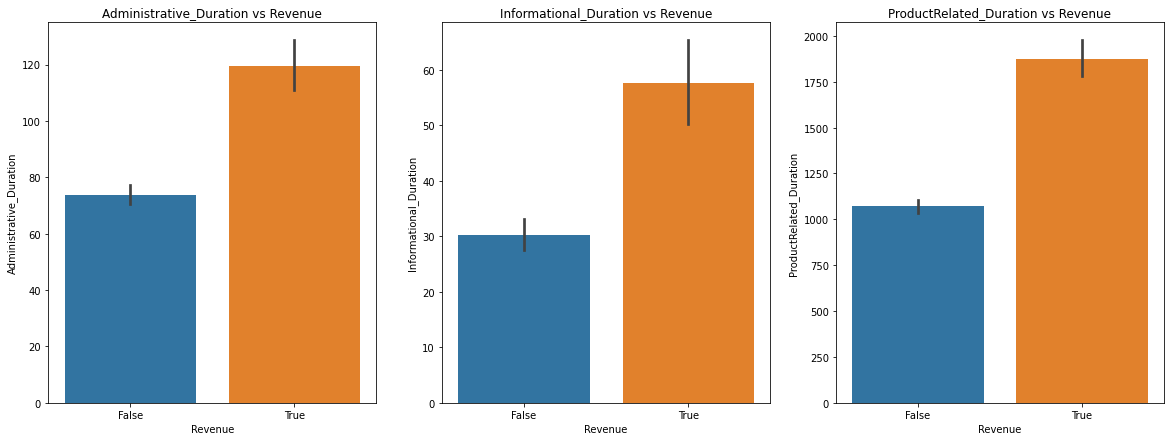

In [67]:
plt.figure(figsize=(20,7))
ax=plt.subplot(131)
sns.barplot( x=df['Revenue'],y=df['Administrative_Duration'] )
plt.title('Administrative_Duration vs Revenue')
ax=plt.subplot(132)
sns.barplot(x=df['Revenue'], y=df['Informational_Duration'])
plt.title('Informational_Duration vs Revenue')
ax=plt.subplot(133)
sns.barplot(x=df['Revenue'], y=df['ProductRelated_Duration'])
plt.title('ProductRelated_Duration vs Revenue')

Text(0.5, 1.0, 'Revenue vs PageValues')

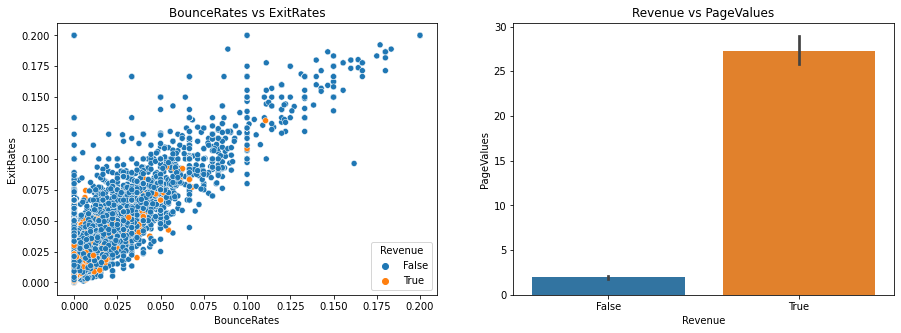

In [139]:
plt.figure(figsize=(15,5))
ax=plt.subplot(121)
sns.scatterplot(x=df.BounceRates, y=df.ExitRates, hue=df.Revenue)
plt.xlabel('BounceRates')
plt.ylabel('ExitRates')
plt.title('BounceRates vs ExitRates')
ax=plt.subplot(122)
sns.barplot(y=df['PageValues'], x=df['Revenue'])
plt.title('Revenue vs PageValues')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Month vs Revenue')

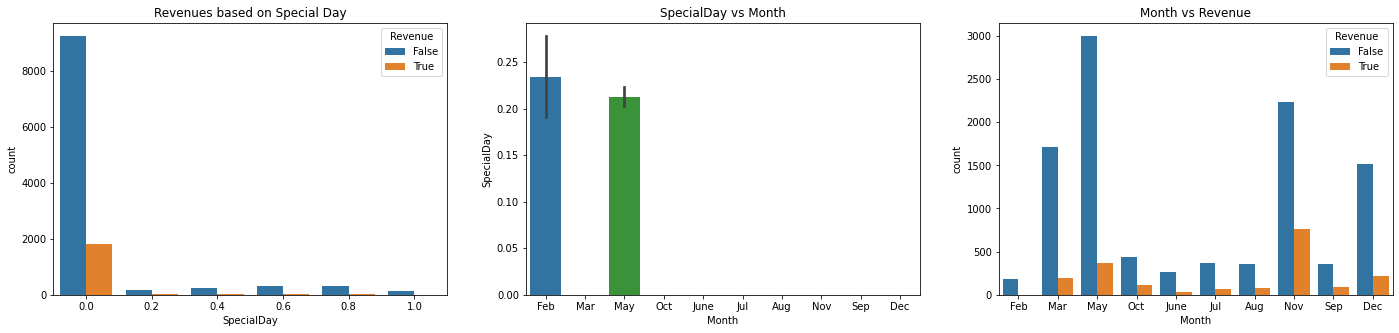

In [90]:
plt.figure(figsize=(24,5))
ax=plt.subplot(131)
sns.countplot(df['SpecialDay'],hue=df['Revenue'])
plt.title('Revenues based on Special Day')
ax=plt.subplot(132)
sns.barplot(y=df['SpecialDay'], x=df['Month'])
plt.title('SpecialDay vs Month')
ax=plt.subplot(133)
sns.countplot(x=df['Month'], hue=df['Revenue'])
plt.title('Month vs Revenue')

Text(0, 0.5, 'Browser')

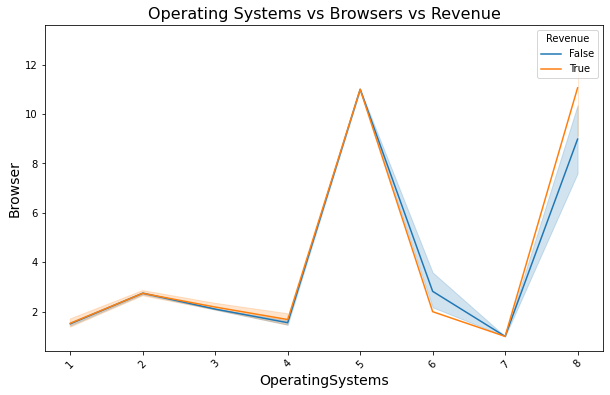

In [91]:
plt.figure(figsize=(10, 6))
sns.lineplot(x = 'OperatingSystems', y = "Browser", hue = "Revenue", data = df, sizes=(2, 2))
plt.title("Operating Systems vs Browsers vs Revenue", fontsize=16)
plt.xlabel("OperatingSystems", fontsize=14)
plt.xticks(rotation=45)
plt.ylabel("Browser", fontsize=14)

Text(0, 0.5, 'Browser')

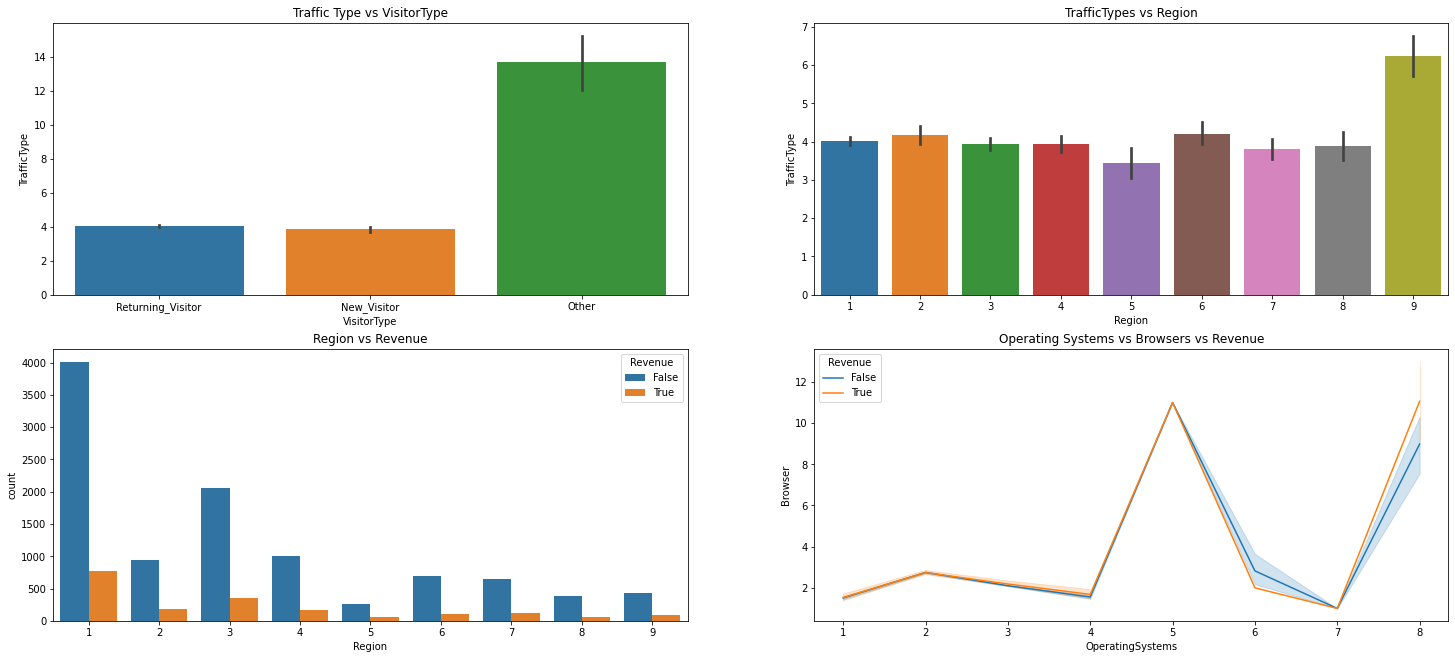

In [120]:
plt.figure(figsize=(25,11))
ax=plt.subplot(221)
sns.barplot(x=df['VisitorType'], y=df['TrafficType']) 
plt.title('Traffic Type vs VisitorType')
ax=plt.subplot(222)
sns.barplot(x='Region', y='TrafficType', data=df)
plt.title('TrafficTypes vs Region')
ax=plt.subplot(223)
sns.countplot(x='Region', hue='Revenue', data=df)
plt.title('Region vs Revenue')
ax=plt.subplot(224)
sns.lineplot(x = 'OperatingSystems', y = "Browser", hue = "Revenue", data = df)
plt.title("Operating Systems vs Browsers vs Revenue")
plt.xlabel("OperatingSystems")
plt.ylabel("Browser")

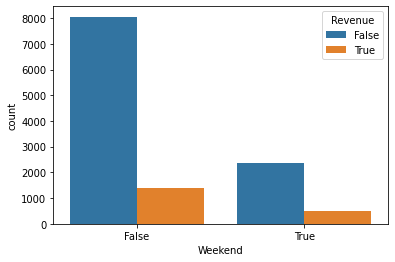

In [145]:
sns.countplot(x=df.Weekend, hue=df.Revenue)

# Outlier Detection and Deletion using IQR method

In [359]:
num = ['Administrative_Duration', 'Informational_Duration','ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues']

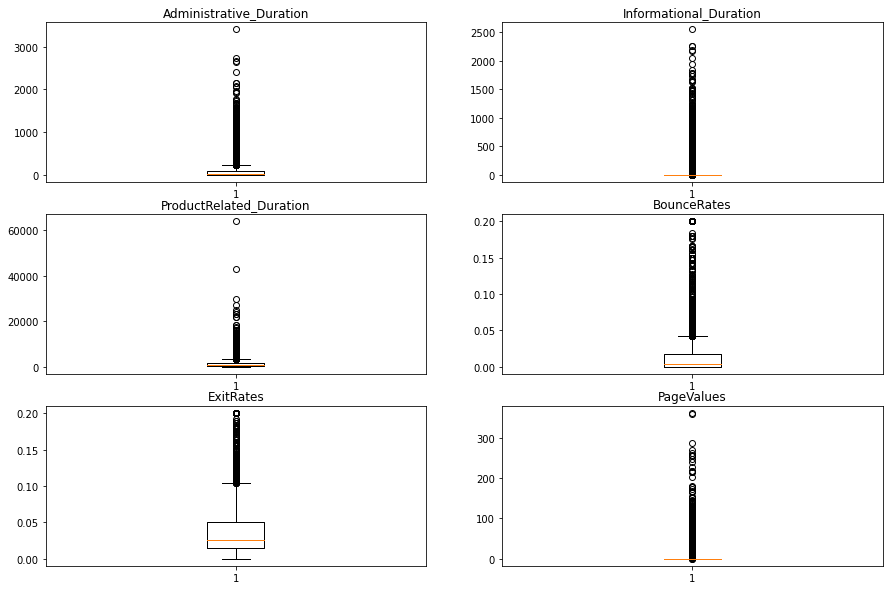

In [360]:
plt.figure(figsize = (15, 10))
for i, value in enumerate(num):
  i=i+1
  ax=plt.subplot(3,2,i)
  plt.boxplot(df[value])
  ax.set_title(value)


In [361]:
## informational duration and page values have only one values if all the other outliers are not considered, remove outliers through iqr method

In [362]:
numeric_attr=['BounceRates','ExitRates','Administrative_Duration','ProductRelated_Duration']
for n in numeric_attr:
    Q1 = df[n].quantile(0.25)
    Q3 = df[n].quantile(0.75)
    IQR = Q3 - Q1     

    filter = (df[n] >= Q1 - 1.5 * IQR) & (df[n] <= Q3 + 1.5 *IQR)
    df=df.loc[filter]

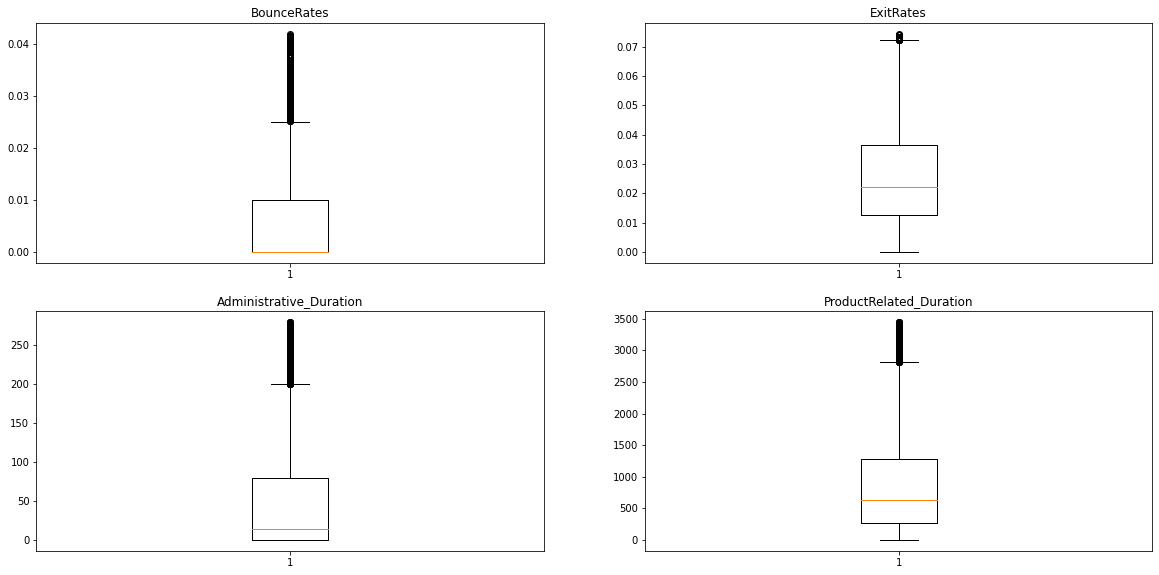

In [363]:
plt.figure(figsize = (20, 15))
for i, value in enumerate(numeric_attr):
  i=i+1
  ax=plt.subplot(3,2,i)
  plt.boxplot(df[value])
  ax.set_title(value)

# Data Cleaning (Converting categorical columns to int type)

In [364]:
def data_cleaning(df):
  df.Month[df.Month == 'Feb'] = 2
  df.Month[df.Month == 'Mar'] = 3
  df.Month[df.Month == 'May'] = 5
  df.Month[df.Month == 'June'] = 6
  df.Month[df.Month == 'Jul'] = 7
  df.Month[df.Month == 'Aug'] = 8
  df.Month[df.Month == 'Sep'] = 9
  df.Month[df.Month == 'Oct'] = 10
  df.Month[df.Month == 'Nov'] = 11
  df.Month[df.Month == 'Dec'] = 12

  df.Month = df.Month.astype(int)
  
  df.VisitorType[df.VisitorType == 'Returning_Visitor'] = 1
  df.VisitorType[df.VisitorType == 'New_Visitor'] = 2
  df.VisitorType[df.VisitorType == 'Other'] = 0
  
  df.VisitorType = df.VisitorType.astype(int)

  df.Weekend[df.Weekend == 'True'] = 1
  df.Weekend[df.Weekend == 'False'] = 0
  df.Weekend = df.Weekend.astype(int)

  df.Revenue[df.Revenue == 'True'] = 1
  df.Revenue[df.Revenue == 'False'] = 0
  df.Revenue = df.Revenue.astype(int)

  return df

In [365]:
df = data_cleaning(df)

df.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,8758.000000,8758.000000,8758.000000,8758.000000,8758.000000,8758.000000,8758.000000,8758.000000,8758.000000,8758.000000,8758.000000,8758.000000,8758.000000,8758.000000,8758.000000,8758.000000,8758.000000,8758.000000
mean,2.069765,49.429080,0.419731,26.438102,26.053665,884.807112,0.006273,0.025913,6.721783,0.054053,7.642612,2.116008,2.374286,3.198219,3.941768,1.167047,0.242635,0.164992
std,2.736879,67.763306,1.083321,115.639416,23.501870,796.417009,0.009634,0.016951,20.310077,0.187289,3.411642,0.917652,1.738109,2.429828,3.842781,0.390098,0.428701,0.371195
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,10.000000,265.166667,0.000000,0.012500,0.000000,0.000000,5.000000,2.000000,2.000000,1.000000,2.000000,1.000000,0.000000,0.000000
50%,1.000000,14.000000,0.000000,0.000000,19.000000,631.042857,0.000000,0.022222,0.000000,0.000000,8.000000,2.000000,2.000000,3.000000,2.000000,1.000000,0.000000,0.000000
75%,3.000000,80.050000,0.000000,0.000000,35.000000,1285.040873,0.010000,0.036364,0.000000,0.000000,11.000000,2.000000,2.000000,4.000000,4.000000,1.000000,0.000000,0.000000
max,19.000000,280.336667,16.000000,2252.033333,223.000000,3452.262500,0.041945,0.074286,361.763742,1.000000,12.000000,8.000000,13.000000,9.000000,20.000000,2.000000,1.000000,1.000000


In [366]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8758 entries, 4 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           8758 non-null   int64  
 1   Administrative_Duration  8758 non-null   float64
 2   Informational            8758 non-null   int64  
 3   Informational_Duration   8758 non-null   float64
 4   ProductRelated           8758 non-null   int64  
 5   ProductRelated_Duration  8758 non-null   float64
 6   BounceRates              8758 non-null   float64
 7   ExitRates                8758 non-null   float64
 8   PageValues               8758 non-null   float64
 9   SpecialDay               8758 non-null   float64
 10  Month                    8758 non-null   int64  
 11  OperatingSystems         8758 non-null   int64  
 12  Browser                  8758 non-null   int64  
 13  Region                   8758 non-null   int64  
 14  TrafficType            

# Standardization and Splitting of Data

In [367]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale_feat = scale.fit_transform(df.drop(['SpecialDay','VisitorType','Weekend','Revenue'],axis = 1),)
X =  pd.DataFrame(scale_feat,columns=['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType'])

In [368]:
y = df.Revenue

In [369]:
X.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,Month,OperatingSystems,Browser,Region,TrafficType
0,-0.756293,-0.729479,-0.38747,-0.228638,-0.683119,-0.323099,1.425002,1.421103,-0.330977,-1.654023,0.963374,0.360017,-0.904732,0.015155
1,-0.756293,-0.729479,-0.38747,-0.228638,-0.300149,-0.917399,0.987920,-0.079715,-0.330977,-1.654023,-0.126426,-0.215353,-0.904732,-0.245088
2,-0.756293,-0.729479,-0.38747,-0.228638,-0.980985,-0.184345,-0.651135,-0.217722,-0.330977,-1.654023,-0.126426,0.935388,-0.904732,-0.505332
3,-0.756293,-0.729479,-0.38747,-0.228638,-0.980985,-0.615048,-0.651135,2.404398,-0.330977,-1.654023,-1.216226,-0.790724,-0.081582,-0.245088
4,-0.756293,-0.729479,-0.38747,-0.228638,-0.427806,-0.599038,1.295243,-0.004674,-0.330977,-1.654023,-1.216226,-0.790724,0.329993,-0.245088


In [370]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=55, stratify=y)


In [371]:
print(X_train.shape, X_test.shape,y_train.shape,y_test.shape)

(7006, 14) (1752, 14) (7006,) (1752,)


# KNN algorithm

In [204]:
from sklearn.neighbors import KNeighborsClassifier

In [205]:
error_rate = []
for i in range(1,30):
 knn1 = KNeighborsClassifier(n_neighbors=i)
 knn1.fit(X_train,y_train)
 predicted_i = knn1.predict(X_test)
 error_rate.append(np.mean(predicted_i != y_test))

Text(0.5, 1.0, 'error rates on different k values')

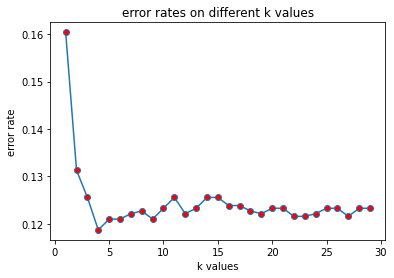

In [206]:
  plt.plot(range(1,30),error_rate,marker='o', markerfacecolor='red')
  plt.xlabel('k values')
  plt.ylabel('error rate')
  plt.title('error rates on different k values')

In [207]:
min_error_rate = min(error_rate)

In [208]:
for i, value in enumerate(error_rate):
  if value == min_error_rate:
    print('Min error_rate=',value*100,'and k =', i+1)
  

Min error_rate= 11.87214611872146 and k = 4


In [209]:

tt_sc = [] #test score
tr_sc = [] #train score

for k in range(1,30):

    knn2 = KNeighborsClassifier(k)
    knn2.fit(X_train,y_train)
    
    tr_sc.append(knn2.score(X_train,y_train))
    tt_sc.append(knn2.score(X_test,y_test))

Text(0.5, 1.0, 'Accuracy score vs k values')

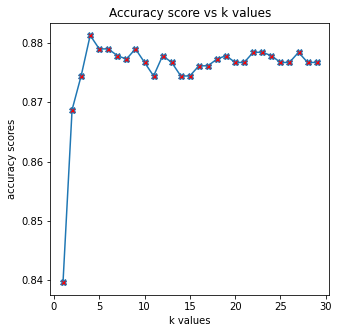

In [217]:
plt.figure(figsize=(5,5))
plt.plot(range(1,30),tt_sc,marker='X',markerfacecolor='red')
plt.xlabel('k values')
plt.ylabel('accuracy scores')
plt.title('Accuracy score vs k values')

In [218]:
max_test_score = max(tt_sc)
for k, value in enumerate(tt_sc):
   if value == max_test_score:
     print('Maximum knn score for test is :', value*100, 'at k = ',k+1)

Maximum knn score for test is : 88.12785388127854 at k =  4


In [219]:
knn = KNeighborsClassifier(4)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.8812785388127854

In [220]:
y_pred = knn.predict(X_test)

In [221]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      1463
           1       0.80      0.37      0.51       289

    accuracy                           0.88      1752
   macro avg       0.85      0.68      0.72      1752
weighted avg       0.87      0.88      0.86      1752



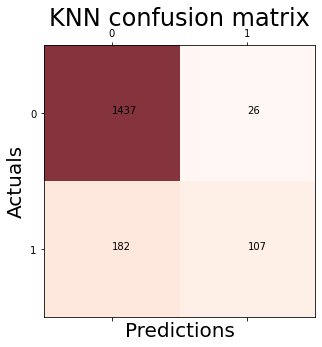

In [222]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_mat, cmap=plt.cm.Reds, alpha=0.8)
for i in range(conf_mat.shape[0]):
    for j in range(conf_mat.shape[1]):
        ax.text(x=j, y=i, s=conf_mat[i, j])

  
plt.xlabel('Predictions', fontsize=20)
plt.ylabel('Actuals', fontsize=20)
plt.title('KNN confusion matrix', fontsize=24)
plt.show()

In [223]:
from sklearn.metrics import roc_curve
m_knn_pred=y_pred
m_knn_score = knn.predict_proba(X_test)[:,1]


In [224]:
m_fpr, m_tpr, m_thresholds = roc_curve(y_test, m_knn_score)

In [225]:
from sklearn import metrics

In [383]:
knn=round(metrics.accuracy_score(y_test, y_pred)*100)
print(knn)

88


KNN:  Accuracy: 88


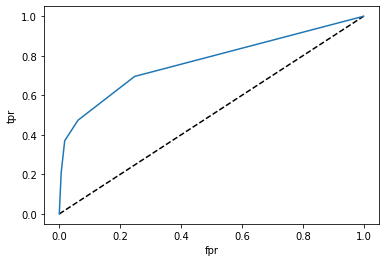

In [226]:
m_knn_auc = metrics.roc_auc_score(y_test, m_knn_score)
plt.plot([0,1],[0,1],'k--')
plt.plot(m_fpr, m_tpr, label = 'KNN')
plt.xlabel('fpr')
plt.ylabel('tpr')
print("KNN:  Accuracy:", round(metrics.accuracy_score(y_test, m_knn_pred)*100))

In [88]:
m_knn_auc

0.7691700941564354

# Random Forest Classifier

In [333]:
from sklearn.ensemble import RandomForestClassifier

In [334]:
rf=RandomForestClassifier(n_estimators=130,criterion='entropy',random_state=55)

In [335]:
rf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=130, random_state=55)

In [336]:
pred_by_rf= rf.predict(X_test)

In [337]:
a=round(metrics.accuracy_score(y_test, pred_by_rf)*100)
print(a)

90


In [338]:
print(classification_report(y_test,pred_by_rf))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1463
           1       0.74      0.57      0.65       289

    accuracy                           0.90      1752
   macro avg       0.83      0.77      0.79      1752
weighted avg       0.89      0.90      0.89      1752



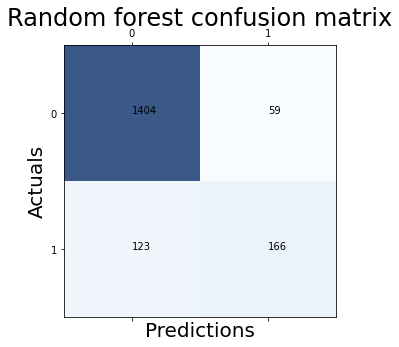

In [317]:
conf_mat = confusion_matrix(y_test,pred_by_rf)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_mat, cmap=plt.cm.Blues, alpha=0.8)
for i in range(conf_mat.shape[0]):
    for j in range(conf_mat.shape[1]):
        ax.text(x=j, y=i, s=conf_mat[i, j])

  
plt.xlabel('Predictions', fontsize=20)
plt.ylabel('Actuals', fontsize=20)
plt.title('Random forest confusion matrix', fontsize=24)

plt.show()

# Logistic Regresion

In [372]:
from sklearn.linear_model import LogisticRegression

In [373]:
lr=LogisticRegression()

In [374]:
lr.fit(X_train, y_train)

LogisticRegression()

In [375]:
lr_pred = lr.predict(X_test)

In [376]:
print(classification_report(y_test,lr_pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      1463
           1       0.77      0.41      0.54       289

    accuracy                           0.88      1752
   macro avg       0.83      0.69      0.74      1752
weighted avg       0.87      0.88      0.87      1752



In [377]:
b=round(metrics.accuracy_score(y_test, lr_pred)*100)
b


88

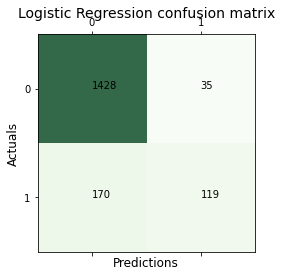

In [378]:
conf_mat = confusion_matrix(y_test,lr_pred)
fig, ax = plt.subplots(figsize=(4, 4))
ax.matshow(conf_mat, cmap=plt.cm.Greens, alpha=0.8)
for i in range(conf_mat.shape[0]):
    for j in range(conf_mat.shape[1]):
        ax.text(x=j, y=i, s=conf_mat[i, j])

  
plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Actuals', fontsize=12)
plt.title('Logistic Regression confusion matrix', fontsize=14)
plt.show()

In [379]:
m_lr_score = lr.predict_proba(X_test)[:,1]

In [380]:
lr_fpr, lr_tpr, lr_thresholds = roc_curve(y_test, m_lr_score)

Logistic Regression:  Accuracy: 88


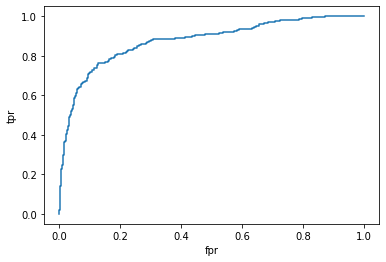

In [382]:
plt.plot(lr_fpr, lr_tpr, label = 'Logistic Regression')
plt.xlabel('fpr')
plt.ylabel('tpr')
print("Logistic Regression:  Accuracy:", round(metrics.accuracy_score(y_test, lr_pred)*100))


In [354]:
m_lr_auc = metrics.roc_auc_score(y_test,m_lr_score )
m_lr_auc

0.8763809492274253

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


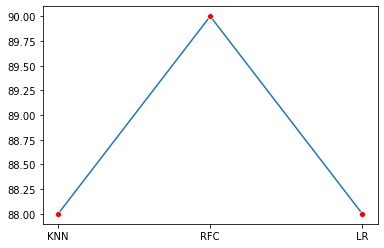

In [417]:
xax = np.array(["KNN", "RFC", "LR"])
yax = np.array([knn, a, b])
sns.lineplot(xax,yax, marker='o', markerfacecolor='red')
